In [86]:
# Necessary Packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [87]:
# Specify directories 

output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"


In [88]:
data = pd.read_csv(f"{output_dir}/data/shimer_decomposition_data.csv")

In [89]:
data

,date,u_rate,seperation_rate,job_finding_rate
0,1990-02-01,NaN,NaN,NaN
1,1990-03-01,NaN,NaN,NaN
2,1990-04-01,0.053150,0.015290,0.295399
3,1990-05-01,0.053365,0.014875,0.283016
4,1990-06-01,0.053376,0.014903,0.282176
...,...,...,...,...
411,2024-05-01,0.038860,0.009797,0.268704
412,2024-06-01,0.039609,0.009938,0.266555
413,2024-07-01,0.040903,0.010181,0.257624
414,2024-08-01,0.041760,0.010669,0.259837


In [90]:
data['date'] = pd.to_datetime(data['date'])
data['u_rate_est'] = data['seperation_rate'] / (data['seperation_rate'] + data['job_finding_rate'] )

In [91]:
bad_period = (data['date'] >= "2020-03-01") & (data['date'] <= '2020-05-01')

In [92]:
data = data[~bad_period]

In [93]:
data['u_rate'].corr(data['u_rate_est'])

0.945647401636719

In [94]:
#data = data.drop(columns=['date']).groupby(data['date'].dt.to_period('Q')).mean().reset_index()
#data['date'] = data['date'].dt.to_timestamp()

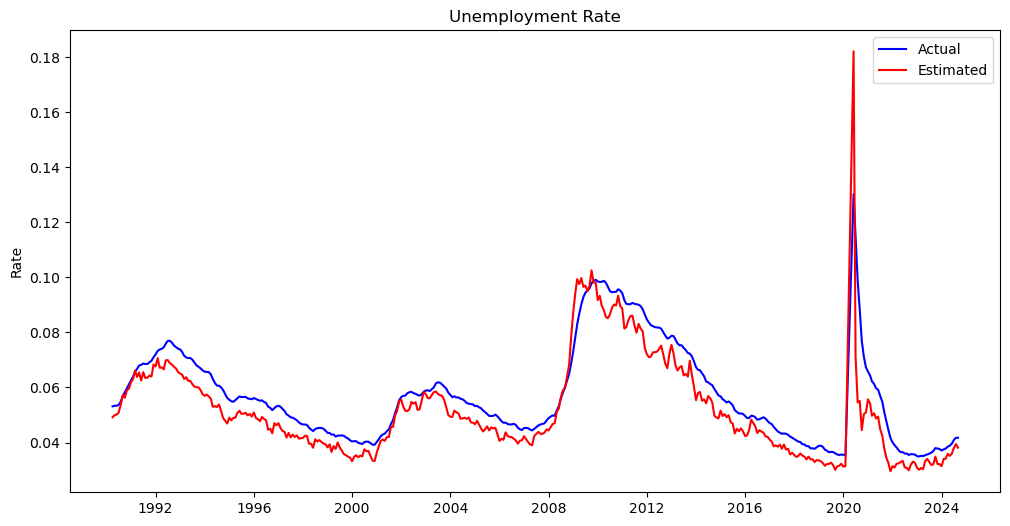

In [95]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data['date'], data['u_rate'], label='Actual', color='blue')
plt.plot(data['date'], data['u_rate_est'], label='Estimated', color='red')
    
# Customize the plot
plt.title('Unemployment Rate')
plt.ylabel('Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_comparison.pdf", bbox_inches='tight')
plt.show()

    

In [96]:
#pre_period = data[(data['date'] <= '2019-12-01') & (data['date'] >= '2016-01-01')]
pre_period = data[data['date'] <= '2019-12-01']

In [97]:
data['u_rate_job_finding'] = np.mean(pre_period['seperation_rate']) / (np.mean(pre_period['seperation_rate']) + data['job_finding_rate'])
data['u_rate_job_destruction'] = data['seperation_rate'] / (data['seperation_rate'] + np.mean(pre_period['job_finding_rate']))

C:\Users\singhy\AppData\Local\Temp\ipykernel_7812\3643640000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['u_rate_job_finding'] = np.mean(pre_period['seperation_rate']) / (np.mean(pre_period['seperation_rate']) + data['job_finding_rate'])
C:\Users\singhy\AppData\Local\Temp\ipykernel_7812\3643640000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['u_rate_job_destruction'] = data['seperation_rate'] / (data['seperation_rate'] + np.mean(pre_period['job_finding_rate']))


In [98]:
data_pre = data[data['date'] <= '2019-12-01']

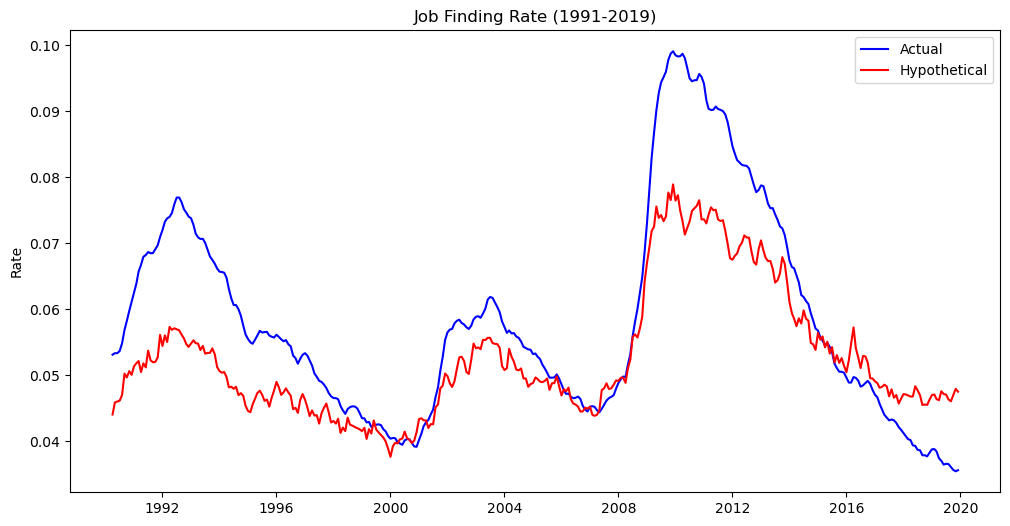

In [99]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_pre['date'], data_pre['u_rate'], label='Actual', color='blue')
plt.plot(data_pre['date'], data_pre['u_rate_job_finding'], label='Hypothetical', color='red')
    
# Customize the plot
plt.title('Job Finding Rate (1991-2019)')
plt.ylabel('Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_comparison_job_finding_pre.pdf", bbox_inches='tight')
plt.show()

    

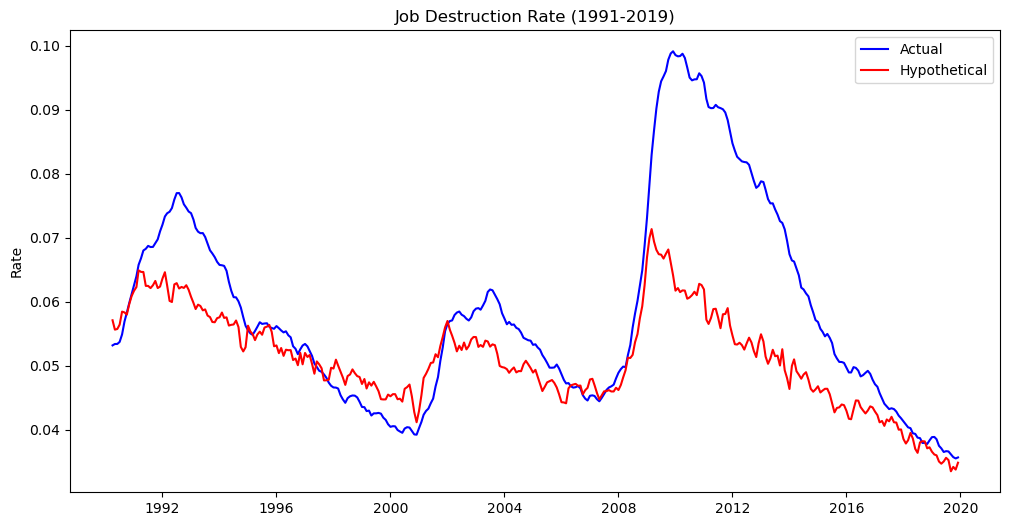

In [100]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_pre['date'], data_pre['u_rate'], label='Actual', color='blue')
plt.plot(data_pre['date'], data_pre['u_rate_job_destruction'], label='Hypothetical', color='red')
    
# Customize the plot
plt.title('Job Destruction Rate (1991-2019)')
plt.ylabel('Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_comparison_job_destruction_pre.pdf", bbox_inches='tight')
plt.show()

In [73]:
data_post = data[data['date'] >= '2021-01-01']
data_post

,date,u_rate,seperation_rate,job_finding_rate,u_rate_est,u_rate_job_finding,u_rate_job_destruction
371,2021-01-01,0.065807,0.014095,0.238929,0.055707,0.053933,0.052852
372,2021-02-01,0.064375,0.013855,0.241680,0.054221,0.053352,0.051999
373,2021-03-01,0.062269,0.012799,0.244544,0.049737,0.052760,0.048228
374,2021-04-01,0.061335,0.012797,0.239899,0.050641,0.053727,0.048219
375,2021-05-01,0.059718,0.012334,0.240571,0.048770,0.053585,0.046557
376,2021-06-01,0.059219,0.012319,0.236882,0.049433,0.054374,0.046501
377,2021-07-01,0.057007,0.011546,0.245665,0.044889,0.052532,0.043712
378,2021-08-01,0.054925,0.011243,0.252287,0.042663,0.051224,0.042614
379,2021-09-01,0.050996,0.010511,0.267505,0.037808,0.048451,0.039950
380,2021-10-01,0.047830,0.009809,0.274131,0.034547,0.047336,0.037383


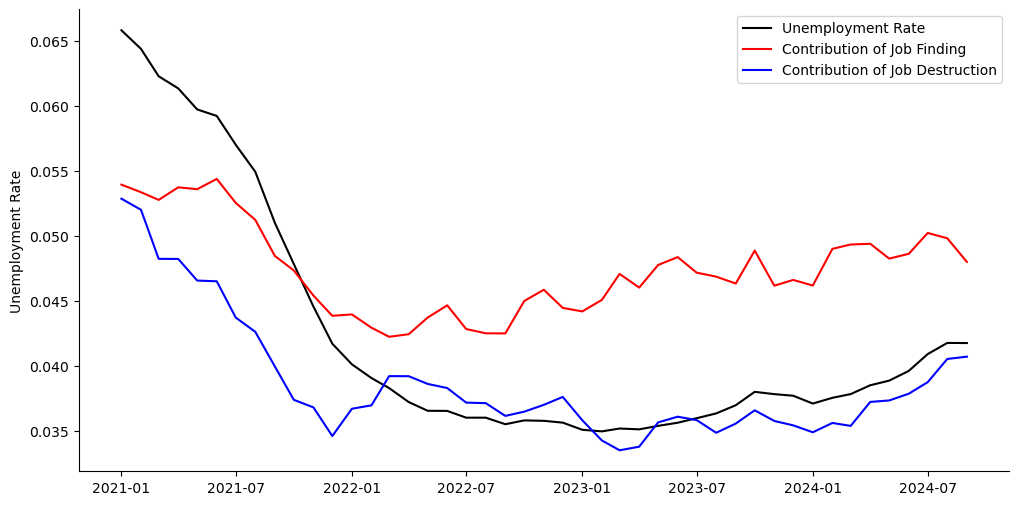

In [75]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_post['date'], data_post['u_rate'], label='Unemployment Rate', color='black')
plt.plot(data_post['date'], data_post['u_rate_job_finding'], label='Contribution of Job Finding', color='red')
plt.plot(data_post['date'], data_post['u_rate_job_destruction'], label='Contribution of Job Destruction', color='blue')
    
# Customize the plot
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_decomposition.pdf", bbox_inches='tight')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(.03, .08)
plt.show()

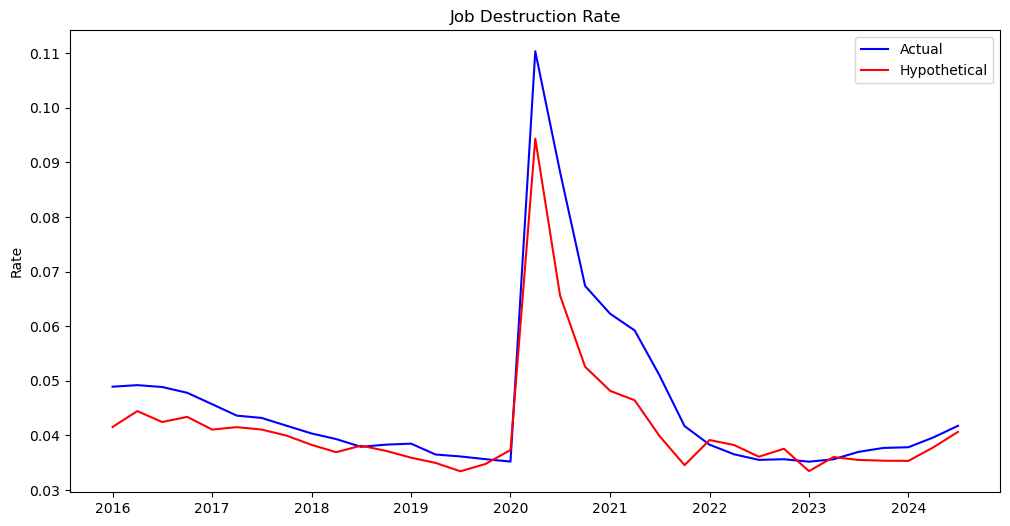

In [71]:
# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_post['date'], data_post['u_rate'], label='Actual', color='blue')
plt.plot(data_post['date'], data_post['u_rate_job_destruction'], label='Hypothetical', color='red')
    
# Customize the plot
plt.title('Job Destruction Rate')
plt.ylabel('Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_comparison_job_destruction_post.pdf", bbox_inches='tight')
plt.show()

In [ ]:
data_pre = data[data['date'] <= '2019-12-01']

In [134]:
# Assuming you have a DataFrame named 'data' with the relevant columns
X = data_pre['u_rate']  # Independent variable
y = data_pre['u_rate_job_finding']  # Dependent variable

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     u_rate_job_finding   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     610.9
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.76e-48
Time:                        09:10:06   Log-Likelihood:                 495.85
No. Observations:                 120   AIC:                            -987.7
Df Residuals:                     118   BIC:                            -982.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0201      0.001     14.788      0.0

In [135]:
# Assuming you have a DataFrame named 'data' with the relevant columns
X = data_post['u_rate']  # Independent variable
y = data_post['u_rate_job_destruction']  # Dependent variable

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     u_rate_job_destruction   R-squared:                       0.802
Model:                                OLS   Adj. R-squared:                  0.787
Method:                     Least Squares   F-statistic:                     52.79
Date:                    Tue, 12 Nov 2024   Prob (F-statistic):           6.31e-06
Time:                            09:10:12   Log-Likelihood:                 73.524
No. Observations:                      15   AIC:                            -143.0
Df Residuals:                          13   BIC:                            -141.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [136]:
# Assuming you have a DataFrame named 'data' with the relevant columns
X = data_post['u_rate']  # Independent variable
y = data_post['u_rate_job_finding']  # Dependent variable

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     u_rate_job_finding   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     17.06
Date:                Tue, 12 Nov 2024   Prob (F-statistic):            0.00119
Time:                        09:10:15   Log-Likelihood:                 70.605
No. Observations:                  15   AIC:                            -137.2
Df Residuals:                      13   BIC:                            -135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0348      0.003     11.394      0.0

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Script is done running


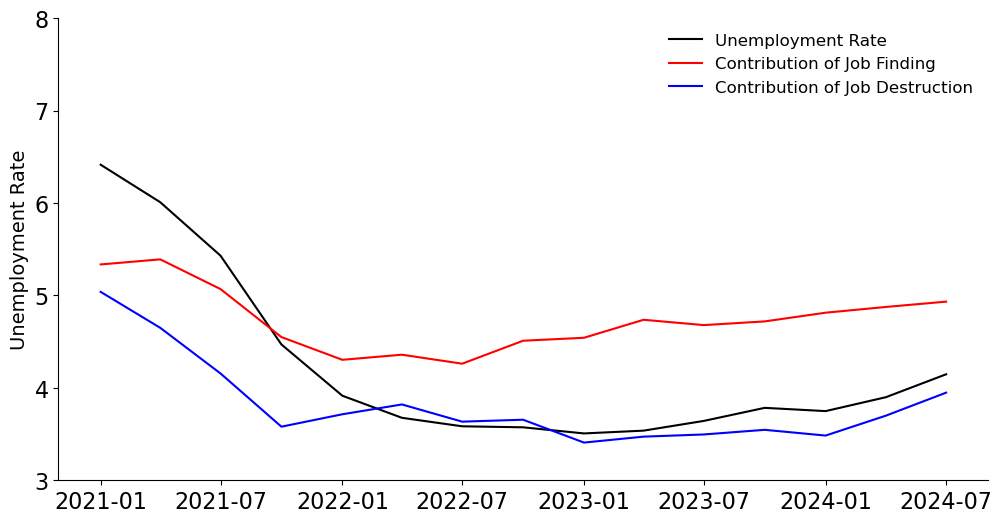

In [101]:

# Specify directories 

output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

# Necessary Packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set global styles
plt.rcParams.update({
    'font.size': 14,             # Set default font size
    'axes.titlesize': 24,        # Title font size
    'axes.labelsize': 20,        # Axis labels font size
    'legend.fontsize': 12,       # Legend font size
    'xtick.labelsize': 16,       # X-axis tick labels
    'ytick.labelsize': 16,       # Y-axis tick labels
    'legend.frameon': False,     # Remove legend box
    'axes.spines.top': False,    # Remove top spine
    'axes.spines.right': False,  # Remove right spine
})

data = pd.read_csv(f"{output_dir}/data/shimer_decomposition_data.csv")


data['date'] = pd.to_datetime(data['date'])

data = data.drop(columns=['date']).groupby(data['date'].dt.to_period('Q')).mean().reset_index()
data['date'] = data['date'].dt.to_timestamp()

#data['u_rate_est'] = data['seperation_rate'] / (data['seperation_rate'] + data['job_finding_rate'] )


data['u_rate_job_finding'] = (np.mean(data['seperation_rate']) / (np.mean(data['seperation_rate']) + data['job_finding_rate']))* 100
data['u_rate_job_destruction'] = (data['seperation_rate'] / (data['seperation_rate'] + np.mean(data['job_finding_rate']))) * 100
data['u_rate'] = data['u_rate']*100
#data['u_rate_est'] = data['u_rate_est'] * 100

data_post = data[data['date'] >= '2021-01-01']

# Create the plot 
plt.figure(figsize=(12, 6)) 
    
# Plot both lines
plt.plot(data_post['date'], data_post['u_rate'], label='Unemployment Rate', color='black')
plt.plot(data_post['date'], data_post['u_rate_job_finding'], label='Contribution of Job Finding', color='red')
plt.plot(data_post['date'], data_post['u_rate_job_destruction'], label='Contribution of Job Destruction', color='blue')
    
# Customize the plot
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig(f"{output_dir}/figures/u_rate_decomposition.pdf", bbox_inches='tight')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(3, 8)
#plt.show()
print("Script is done running")